In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-segmentation/images/2664.png
/kaggle/input/brain-tumor-segmentation/images/2539.png
/kaggle/input/brain-tumor-segmentation/images/1231.png
/kaggle/input/brain-tumor-segmentation/images/1017.png
/kaggle/input/brain-tumor-segmentation/images/2437.png
/kaggle/input/brain-tumor-segmentation/images/2015.png
/kaggle/input/brain-tumor-segmentation/images/2300.png
/kaggle/input/brain-tumor-segmentation/images/2673.png
/kaggle/input/brain-tumor-segmentation/images/2823.png
/kaggle/input/brain-tumor-segmentation/images/1522.png
/kaggle/input/brain-tumor-segmentation/images/2064.png
/kaggle/input/brain-tumor-segmentation/images/641.png
/kaggle/input/brain-tumor-segmentation/images/1088.png
/kaggle/input/brain-tumor-segmentation/images/173.png
/kaggle/input/brain-tumor-segmentation/images/2851.png
/kaggle/input/brain-tumor-segmentation/images/2448.png
/kaggle/input/brain-tumor-segmentation/images/1746.png
/kaggle/input/brain-tumor-segmentation/images/1958.png
/kaggle/inpu

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
import shutil
IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=3

2025-12-03 14:33:47.601036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764772427.828842      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764772427.890096      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
Original=os.listdir('/kaggle/input/brain-tumor-segmentation/images')
Masks=os.listdir('/kaggle/input/brain-tumor-segmentation/masks')
Original = Original
Masks = Masks
print(len(Original))
print(len(Masks))

X=np.zeros((len(Original),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
y=np.zeros((len(Masks),IMG_HEIGHT,IMG_WIDTH,1), dtype=np.int32)

3064
3064


In [4]:
print(X.shape)
print(y.shape)

(3064, 256, 256, 3)
(3064, 256, 256, 1)


In [5]:
import cv2
import numpy as np 
for file in Original:
    n=Original.index(file)
    path1=os.path.join('/kaggle/input/brain-tumor-segmentation/images',file)
    print(path1)
    img=cv2.imread(path1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    try:
        X[n]=img/255
        file2=Masks[n]
        path2=os.path.join('/kaggle/input/brain-tumor-segmentation/masks',file2)
        mask=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
        mask=cv2.resize(mask,(256,256))
        mask = tf.one_hot(mask, 1, dtype=tf.int32)
        y[n] = mask
    except Exception as e:
        print(e)
        print(path1)

/kaggle/input/brain-tumor-segmentation/images/2664.png


I0000 00:00:1764772444.264300      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764772444.264913      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


/kaggle/input/brain-tumor-segmentation/images/2539.png
/kaggle/input/brain-tumor-segmentation/images/1231.png
/kaggle/input/brain-tumor-segmentation/images/1017.png
/kaggle/input/brain-tumor-segmentation/images/2437.png
/kaggle/input/brain-tumor-segmentation/images/2015.png
/kaggle/input/brain-tumor-segmentation/images/2300.png
/kaggle/input/brain-tumor-segmentation/images/2673.png
/kaggle/input/brain-tumor-segmentation/images/2823.png
/kaggle/input/brain-tumor-segmentation/images/1522.png
/kaggle/input/brain-tumor-segmentation/images/2064.png
/kaggle/input/brain-tumor-segmentation/images/641.png
/kaggle/input/brain-tumor-segmentation/images/1088.png
/kaggle/input/brain-tumor-segmentation/images/173.png
/kaggle/input/brain-tumor-segmentation/images/2851.png
/kaggle/input/brain-tumor-segmentation/images/2448.png
/kaggle/input/brain-tumor-segmentation/images/1746.png
/kaggle/input/brain-tumor-segmentation/images/1958.png
/kaggle/input/brain-tumor-segmentation/images/1479.png
/kaggle/inpu

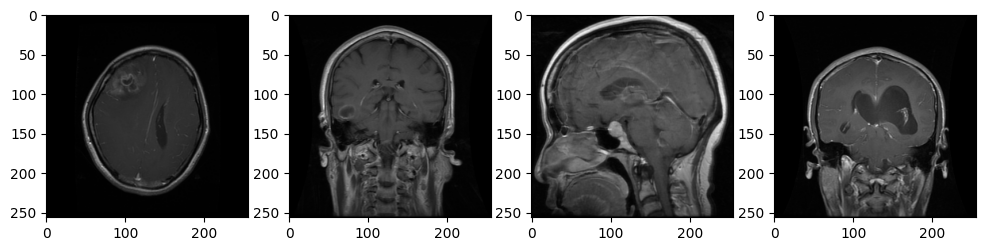

In [6]:
import matplotlib.pyplot as plt
i = np.random.randint(1, 100)
plt.figure(figsize = (12,15))
plt.subplot(141)
plt.imshow(X[i])

plt.subplot(142)
plt.imshow(X[i+1])

plt.subplot(143)
plt.imshow(X[i+2])

plt.subplot(144)
plt.imshow(X[i+3])

In [7]:
images = X

print(images.shape)

(3064, 256, 256, 3)


In [8]:
masks = y
masks.shape

(3064, 256, 256, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,masks,test_size=0.2,random_state=42)

In [10]:
inputs=tf.keras.layers.Input((256,256,3))


s = inputs

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)  # Original 0.1
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)


c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.2)(c2)  # Original 0.1
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

#Expansive path 

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)  # Original 0.1
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)  # Original 0.1
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
     
  
 
outputs = Conv2D(1,(1, 1),activation='sigmoid')(c9)
 
model = Model(inputs=[inputs], outputs=[outputs])

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:


# import keras.backend as K
# from tensorflow.keras.metrics import MeanIoU

# def iou_metric(y_true, y_pred, smooth=1e-6):
#     """
#     Keras compatible IoU (Jaccard Index) metric.
#     Assumes y_true and y_pred are tensors of shape (batch, H, W, 1).
#     """
#     # Flatten the prediction and ground truth to calculate the intersection and union
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
    
#     # Calculate intersection
#     intersection = K.sum(y_true_f * y_pred_f)
    
#     # Calculate union (A + B - A∩B)
#     union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    
#     # Calculate IoU score
#     iou = (intersection + smooth) / (union + smooth)
#     return iou
# import keras.backend as K
# import tensorflow as tf 

# def iou_metric(y_true, y_pred, smooth=1e-6):
#     """
#     Keras compatible IoU (Jaccard Index) metric.
#     Assumes y_true and y_pred are tensors of shape (batch, H, W, 1).
#     """
#     # 
#     y_true_f = tf.reshape(y_true, [-1])
#     y_pred_f = tf.reshape(y_pred, [-1])
    
#     # Calculate intersection
#     intersection = tf.reduce_sum(y_true_f * y_pred_f)
    
#     # Calculate union (A + B - A∩B)
#     union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    
#     # Calculate IoU score
#     iou = (intersection + smooth) / (union + smooth)
#     return iou
import tensorflow as tf

def iou_metric(y_true, y_pred, smooth=1e-6):
    """
    Keras compatible IoU (Jaccard Index) metric.
    Assumes y_true and y_pred are tensors of shape (batch, H, W, 1).
    """
    # 1. Cast y_true to float32 to match y_pred
    y_true = tf.cast(y_true, tf.float32) 
    
    # 2. Flatten the tensors
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    
    # 3. Calculate intersection (Now both tensors are float32)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    
    # 4. Calculate union (A + B - A∩B)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    
    # 5. Calculate IoU score
    iou = (intersection + smooth) / (union + smooth)
    return iou

In [13]:
# model.compile(optimizer = tf.keras.optimizers.Adam(),
#               loss='binary_crossentropy', metrics=['accuracy'],
#               )

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy', 
    metrics=['accuracy', iou_metric] 
)

In [14]:
import keras.backend as K

#spe=len(image_generator)//batch_size,
#vs=len(mask_generator)//batch_size,

history=model.fit(X_train, y_train,validation_data = (X_test,y_test),
                  epochs=10,
                  )

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)
I0000 00:00:1764772511.354507      68 service.cc:148] XLA service 0x7829b0111700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764772511.355542      68 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764772511.355567      68 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764772512.414972      68 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1764772535.818552      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 77s 609ms/step - accuracy: 0.9085 - iou_metric: 0.8414 - loss: 0.2570 - val_accuracy: 0.9819 - val_iou_metric: 0.9323 - val_loss: 0.0899
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.9825 - iou_metric: 0.9658 - loss: 0.0697 - val_accuracy: 0.9819 - val_iou_metric: 0.9538 - val_loss: 0.0707
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.9824 - iou_metric: 0.9682 - loss: 0.0627 - val_accuracy: 0.9819 - val_iou_metric: 0.9527 - val_loss: 0.0681
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.9829 - iou_metric: 0.9717 - loss: 0.0547 - val_accuracy: 0.9819 - val_iou_metric: 0.9428 - val_loss: 0.0751
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.9822 - iou_metric: 0.9730 - loss: 0.0502 - val_accuracy: 0.9819 - val_iou_metric: 0.9571 - val_loss: 0.0627
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 269ms/step - accuracy: 0.9834 - iou_metric: 0.9760 - loss: 0.0448 - val_accuracy: 0.9840 - val

In [15]:
CUSTOM_OBJECTS = {
    'iou_metric': iou_metric
}

# Define the file path
SAVE_PATH = 'best_brain_tumor_unet_model.h5'

# Save the model
model.save(SAVE_PATH, save_format='h5', include_optimizer=True)

print(f"Model saved successfully to {SAVE_PATH} with custom IoU metric defined.")

Model saved successfully to best_brain_tumor_unet_model.h5 with custom IoU metric defined.


/tmp/ipykernel_20/3978502248.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='green',label='Validation acc')


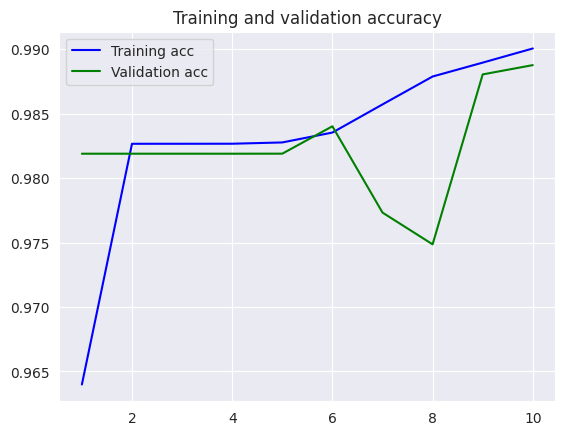

In [16]:
import seaborn as sns
sns.set_style('darkgrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='green',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

/tmp/ipykernel_20/2865424556.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', color = 'green', label='Validation loss')


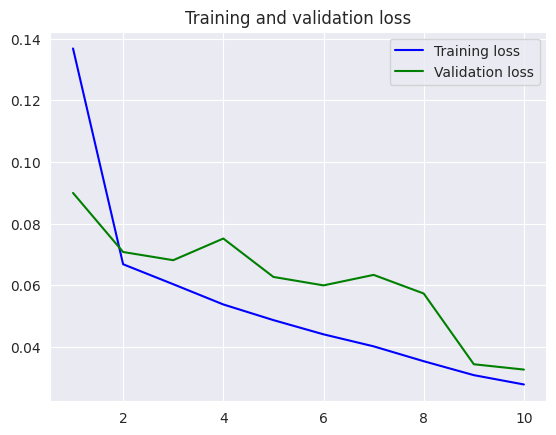

In [17]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', color = 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
def predict_image(img_path, mask_path, model):
    H = 256
    W = 256
    num_classes = 1

    img = cv2.imread(img_path)
    img = img[:256, :256, :]
    img = img / 255.0
    img = img.astype(np.float32)

    
    ## Prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    #pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    
    
    # calculating IOU score
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)

    iou = inter.sum() / union.sum()

    return img, mask, pred_mask, iou

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


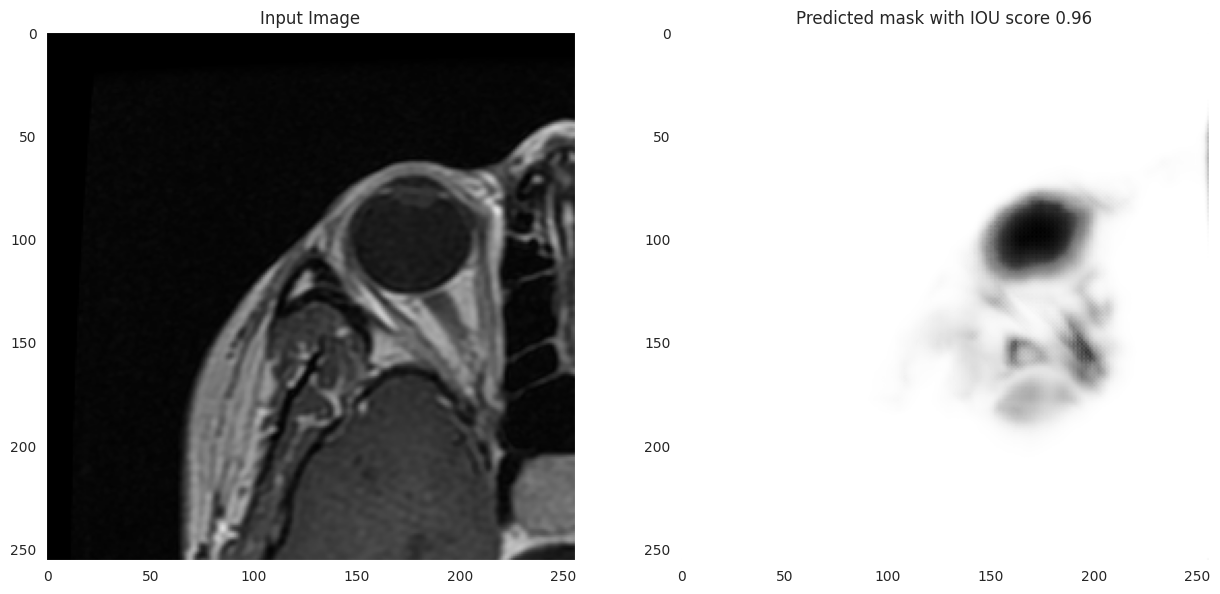

In [19]:
sns.set_style('dark')
img_path = '/kaggle/input/brain-tumor-segmentation/images/1000.png'
mask_path = '/kaggle/input/brain-tumor-segmentation/masks/1000.png'

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("Predicted mask with IOU score %.2f"%(iou))
ax2.imshow(pred_mask, cmap='gray')

plt.show()